# [8] 파이썬 시각화

In [1]:
# !pip install matplotlib
# !pip3 install seaborn

In [2]:
# 가장 기본적인 그래프 %matplotlib inline 불필요
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 직접 시각화하는 방법

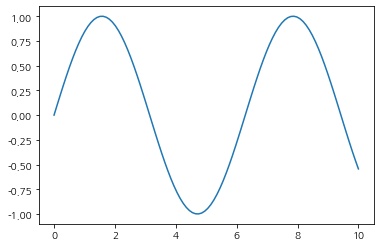

In [3]:
# 0부터 10까지 100등분
x=np.linspace(0,10,100)
plt.plot(x,np.sin(x))
plt.show() # 그림의 끝에 입력

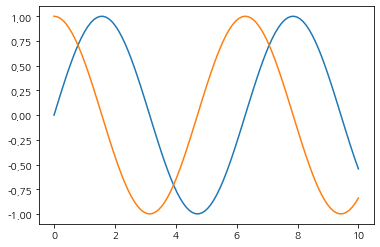

In [4]:
# 두개의 그래프 그리기
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
plt.show()

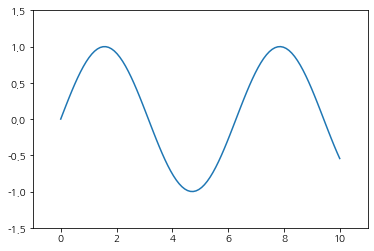

In [5]:
# x축, y축 범위 지정
plt.plot(x,np.sin(x))
plt.xlim(-1,11) # x축 범위
plt.ylim(-1.5,1.5) # y축 범위
plt.show()

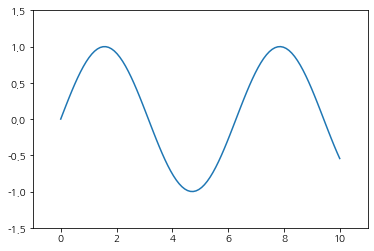

In [6]:
plt.plot(x,np.sin(x))
plt.axis([-1,11,-1.5,1.5]) # x, y축 범위 한번에 정함
plt.show()

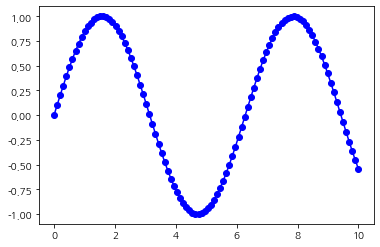

In [7]:
# 그래프 스타일 변경
# matplotlib에 설정되어 있는 그래프의 스타일에 관련해서는 다음의 링크 참고
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html  
plt.plot(x,np.sin(x),'b-o') # 파란색 동그라미로 표시한 후 줄로 연결
plt.show()

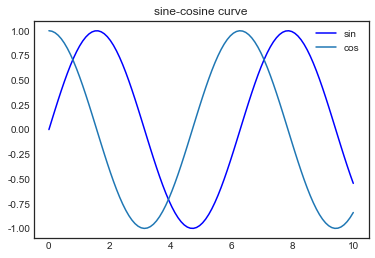

In [8]:
plt.style.use('seaborn-white')
plt.plot(x,np.sin(x),'b',label='sin')
plt.plot(x,np.cos(x),label='cos')
plt.title('sine-cosine curve')
plt.legend() # 범례
plt.show()

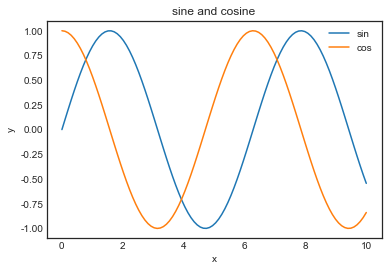

In [9]:
plt.plot(x,np.sin(x),label='sin')
plt.plot(x,np.cos(x),label='cos')
plt.legend(loc='upper right') # 범례 위치를 오른쪽 위로 설정
plt.title('sine and cosine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 객체화를 수행한 뒤 시각화

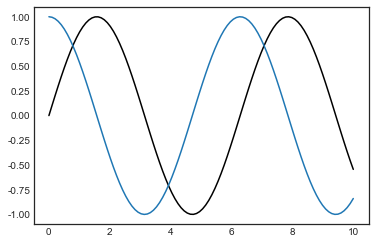

In [10]:
ax=plt.axes()
ax.plot(x,np.sin(x),'k-') # 검은색 줄로 연결
ax.plot(x,np.cos(x))
plt.show()

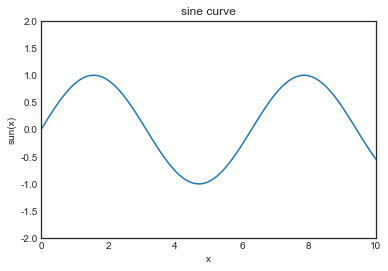

In [11]:
ax=plt.axes()
ax.plot(x,np.sin(x))
ax.set(xlim=(0,10),ylim=(-2,2),xlabel='x',ylabel='sun(x)',title='sine curve') # 범위, 라벨, 제목 한번에 설정
plt.show()

### subplot

**방법1**

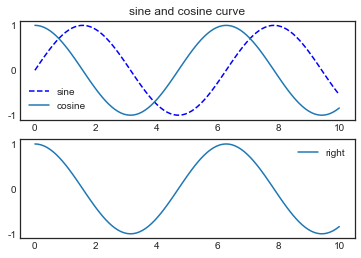

In [12]:
# 2개 이상의 그래프를 하나로 묶어서 출력
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0,10,100)

plt.figure() # 시작(figure: top level container for all the plot elements)
plt.subplot(2,1,1) # subplot(행, 열, 몇번째 plot인지)
plt.plot(x,np.sin(x),'b--',label='sine')
plt.plot(x,np.cos(x),label='cosine')
plt.title('sine and cosine curve')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(x,np.cos(x),label='right')


plt.legend(loc='best')
plt.show() # 끝

**방법2**

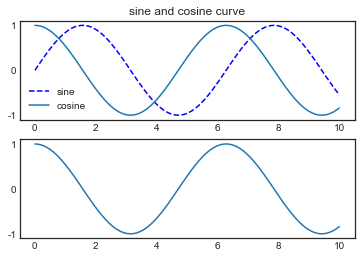

In [13]:
fig, ax = plt.subplots(2,1)
ax[0].plot(x,np.sin(x),'b--',label='sine')
ax[0].plot(x,np.cos(x),label='cosine')
ax[0].set_title('sine and cosine curve')
ax[0].legend(loc='best')
ax[1].plot(x,np.cos(x))
plt.show()

**방법1**

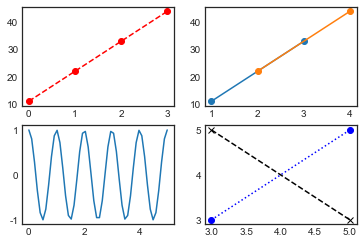

In [14]:
plt.figure() #시작

plt.subplot(2,2,1) # (2,2) 중 첫번째 plot
plt.plot([11,22,33,44],'ro--') # red, dot, dotted line

plt.subplot(2,2,2) # (2,2) 중 두번째 plot
plt.plot([[1,2],[3,4]],[[11,22],[33,44]],'o-') # orange line

plt.subplot(2,2,3) # (2,2) 중 세번째 plot
plt.plot(np.linspace(0,5),np.cos(2*np.pi*np.linspace(0,5)))

plt.subplot(2,2,4) # (2,2) 중 네번째 plot
plt.plot([3,5],[3,5],'bo:')
plt.plot([3,5],[5,3],'kx--')

plt.show() #끝

**방법2**

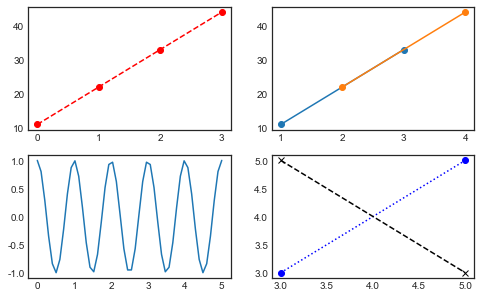

In [15]:
fig, ax = plt.subplots(2,2,figsize=(8,5))
ax[0][0].plot([11,22,33,44],'ro--')
ax[0][1].plot([[1,2],[3,4]],[[11,22],[33,44]],'o-')
ax[1][0].plot(np.linspace(0,5),np.cos(2*np.pi*np.linspace(0,5)))
ax[1][1].plot([3,5],[3,5],'bo:')
ax[1][1].plot([3,5],[5,3],'kx--')
plt.show()

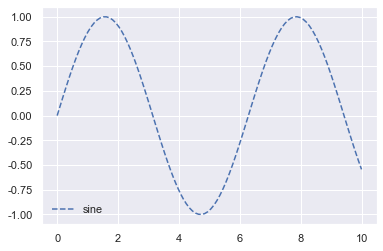

In [16]:
# seaborn을 이용한 그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
x=np.linspace(0,10,100)
plt.plot(x,np.sin(x),'b--',label='sine')
plt.legend(loc='best')
plt.show()

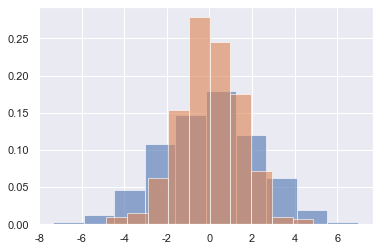

In [17]:
# 히스토그램 그리기
import pandas as pd
bn=np.random.multivariate_normal([0,0],[[5,1],[1,2]],size=1000)
bn=pd.DataFrame(bn,columns=['x','y'])
for i in 'xy':
    plt.hist(bn[i],density=True,alpha=0.6) 
# density=True는 y축 값을 백분율로, alpha는 그림의 투명도인데 1에 가까울수록 불투명

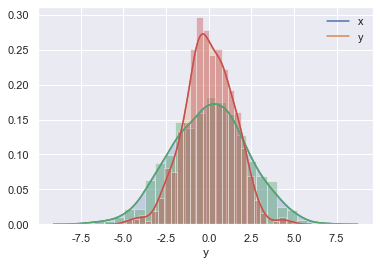

In [18]:
# Kernel density estimation를 이용하여 그리기
for i in 'xy':
    sns.kdeplot(bn[i],shade=True) # 

sns.distplot(bn['x'])
sns.distplot(bn['y'])

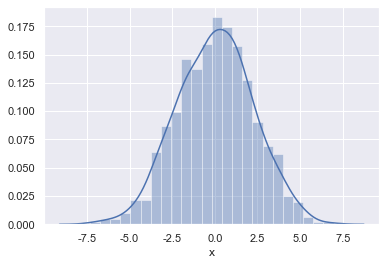

In [19]:
sns.distplot(bn['x'])

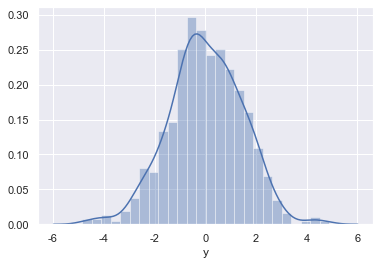

In [20]:
sns.distplot(bn['y'])

C:\Users\chung_es\anaconda3\envs\torch36\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


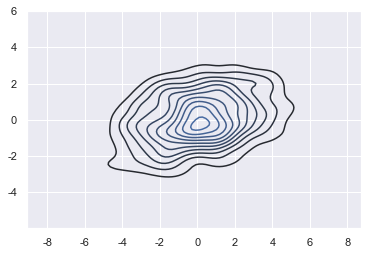

In [21]:
sns.kdeplot(bn) # kde 추정치

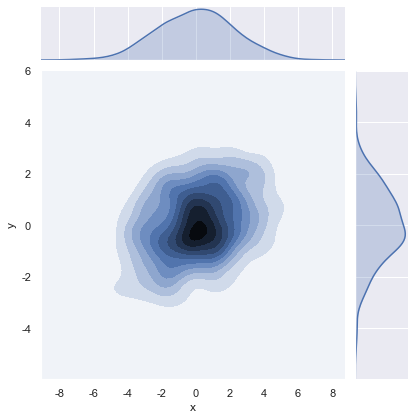

In [22]:
# kde와 주변분포 그리기
sns.jointplot(bn['x'],bn['y'],kind='kde')

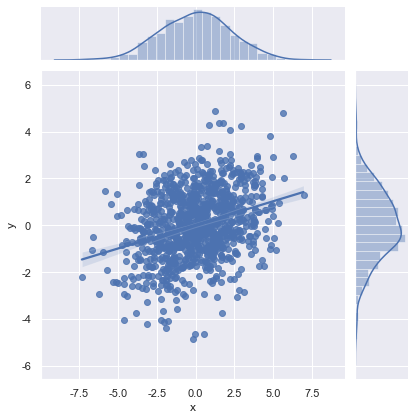

In [23]:
# 회귀선과 주변분포 그리기
sns.jointplot(x='x',y='y',data=bn,kind='reg')

In [24]:
# 각 pair에 대한 산포도 그리기
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


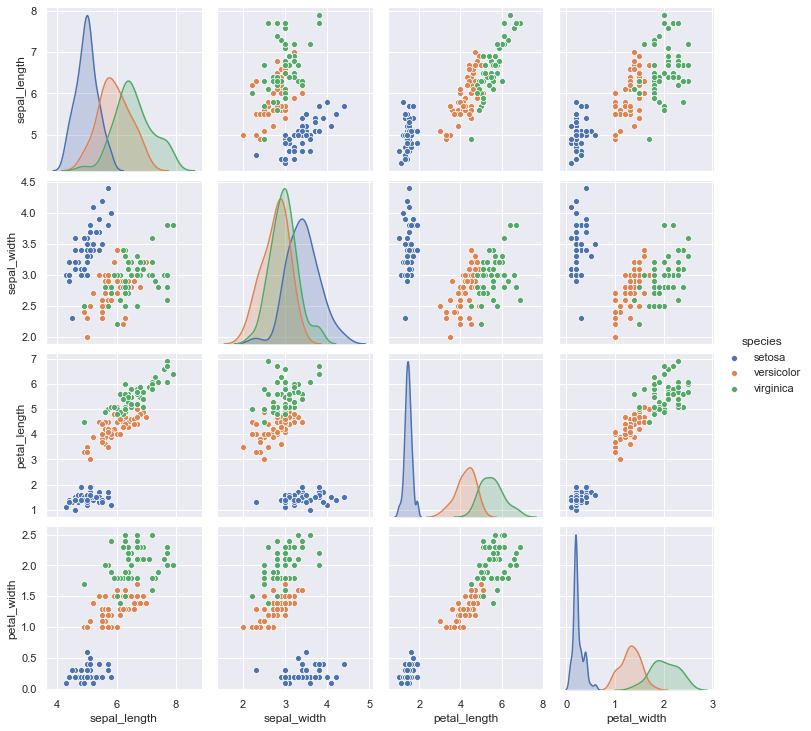

In [25]:
sns.pairplot(iris,hue='species')

In [26]:
# 그룹별 분포 알아보기
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\chung_es\anaconda3\envs\torch36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


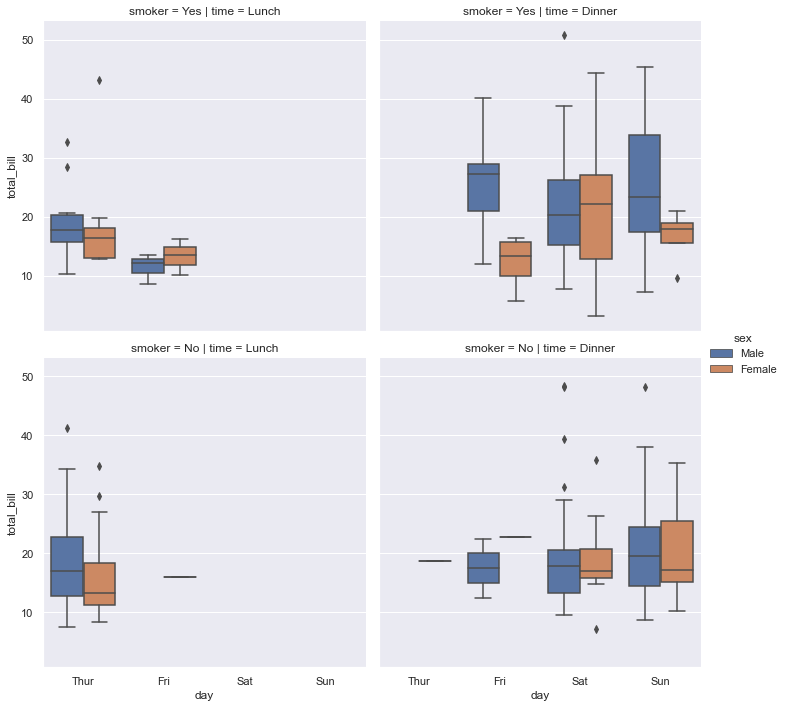

In [27]:
sns.factorplot(x='day',y='total_bill',hue='sex',data=tips,
               row='smoker',col='time',kind='box') # smoker와 time 조합별 boxplot

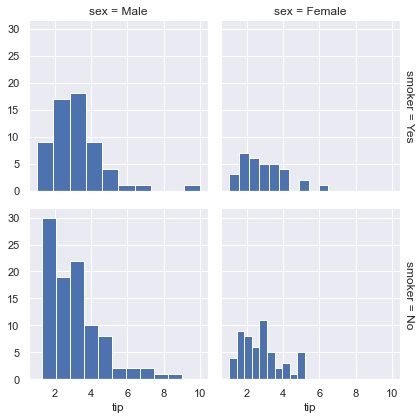

In [28]:
grid=sns.FacetGrid(data=tips,row='smoker',col='sex',margin_titles=True) # 열과 행에 그룹 정보 표시
grid.map(plt.hist,'tip')